In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=e7f62ecb1e336363b05f8893015681c6793b5ca95c48dad2d640ee69ec04c238
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [0]:
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from vecstack import stacking 
from sklearn import *
import sys
from vecstack import StackingTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/Water Consumption/Austin_Water_-_Residential_Water_Consumption - Copy.csv")

In [5]:
data.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201403,78702,Residential,"23,450,100"
1,201311,78746,Multi-Family,"12,801,400"
2,201704,78652,Multi-Family,"58,400"
3,201302,78727,Irrigation - Residential,"1,800"
4,201608,78726,Irrigation - Residential,"82,200"


In [6]:
data.isnull().sum()

Year Month        0
Postal Code       0
Customer Class    0
Total Gallons     0
dtype: int64

In [0]:
year=[]
month=[]
g=[]
for i in range(len(data['Year Month'])):
  year.append(int(str(data['Year Month'][i])[:4]))
  month.append(int(str(data['Year Month'][i])[4:]))
  g.append(int(data['Total Gallons'][i].replace(",",'')))

In [0]:
data=data.drop(['Total Gallons'],1)
data['Year'] = year
data['Month'] = month
data['Total Gallons']=g

In [9]:
data.head(4)

,Year Month,Postal Code,Customer Class,Year,Month,Total Gallons
0,201403,78702,Residential,2014,3,23450100
1,201311,78746,Multi-Family,2013,11,12801400
2,201704,78652,Multi-Family,2017,4,58400
3,201302,78727,Irrigation - Residential,2013,2,1800


In [0]:
data1 = data.drop(['Year Month'],1)

In [11]:
data1.head(4)

,Postal Code,Customer Class,Year,Month,Total Gallons
0,78702,Residential,2014,3,23450100
1,78746,Multi-Family,2013,11,12801400
2,78652,Multi-Family,2017,4,58400
3,78727,Irrigation - Residential,2013,2,1800


In [0]:
X = data1.drop(['Total Gallons'],1)

In [0]:
y = data1['Total Gallons']

In [14]:
X.head()

,Postal Code,Customer Class,Year,Month
0,78702,Residential,2014,3
1,78746,Multi-Family,2013,11
2,78652,Multi-Family,2017,4
3,78727,Irrigation - Residential,2013,2
4,78726,Irrigation - Residential,2016,8


In [0]:
X=pd.get_dummies(X)

In [0]:
cols12 = X.columns

In [17]:
X.head()

,Postal Code,Year,Month,Customer Class_Irrigation - Multi-Family,Customer Class_Irrigation - Residential,Customer Class_Multi-Family,Customer Class_Residential
0,78702,2014,3,0,0,0,1
1,78746,2013,11,0,0,1,0
2,78652,2017,4,0,0,1,0
3,78727,2013,2,0,1,0,0
4,78726,2016,8,0,1,0,0


In [18]:
X_train, X_test, y_train, y_test = tts(
    X,
    y,
    test_size=0.3,
    random_state=0)
 
X_train.shape, X_test.shape

((9128, 7), (3912, 7))

In [0]:
def lassoCV(X_train,y_train,X_test,y_test):
  lasso = LassoCV(alphas=np.arange(0.1,2,0.1))
  lasso_model = lasso.fit(X_train,y_train)
  print('Train set')
  pred=lasso_model.predict(X_train)
  print('LassoCV Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
  print('LassoCV r2_score :{}'.format(r2_score(y_train,pred)))
  print('Tesst set')
  pred=lasso_model.predict(X_test)
  print('LassoCV Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
  print('LassoCV r2_score :{}'.format(r2_score(y_test,pred))) 
  plt.scatter(y_test,pred,color='gray')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred, 1))(np.unique(y_test)))
  plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2_score(y_test,pred))
  plt.show()
  df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
  df1 = df.head(30)
  df1.plot(kind='bar',figsize=(10,8))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()
  visualizer = ResidualsPlot(lasso_model)
  visualizer.fit(X_train, y_train)
  visualizer.score(X_test, y_test)
  visualizer.poof()  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train set
LassoCV Mean Squared error :229947623543523.78
LassoCV r2_score :0.37211569728517535
Tesst set
LassoCV Mean Squared error :226346534296531.1
LassoCV r2_score :0.3757300550557343


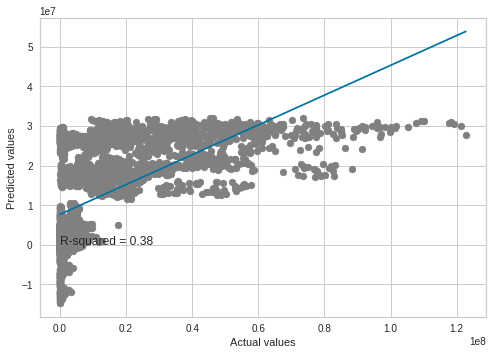

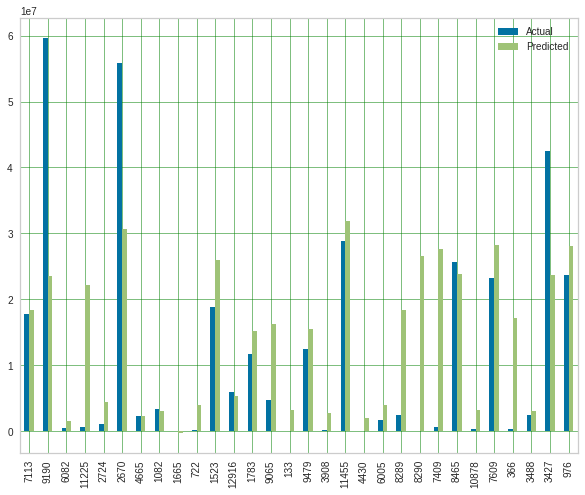

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


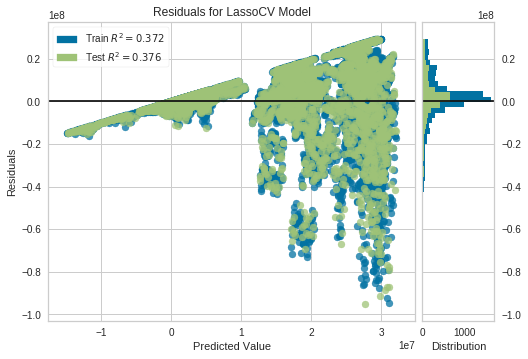

In [20]:
lassoCV(X_train,y_train,X_test,y_test)

In [0]:
def AdaBoost(X_train,y_train,X_test,y_test):
  ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = 42,max_depth=3, min_samples_leaf=5) , random_state=42)
  ada.fit(X_train,y_train)
  print('Train set')
  pred=ada.predict(X_train)
  print('Adaboost Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
  print('Adaboost r2_score :{}'.format(r2_score(y_train,pred)))
  print('Tesst set')
  pred=ada.predict(X_test)
  print('Adaboost Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
  print('Adaboost r2_score :{}'.format(r2_score(y_test,pred)))
  plt.scatter(y_test,pred,color='gray')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred, 1))(np.unique(y_test)))
  plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2_score(y_test,pred))
  plt.show()
  df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
  df1 = df.head(30)
  df1.plot(kind='bar',figsize=(10,8))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()
  visualizer = ResidualsPlot(ada)
  visualizer.fit(X_train, y_train)
  visualizer.score(X_test, y_test)
  visualizer.poof()

Train set
Adaboost Mean Squared error :180506402222593.56
Adaboost r2_score :0.507117600310217
Tesst set
Adaboost Mean Squared error :174652085065708.53
Adaboost r2_score :0.5183047627955573


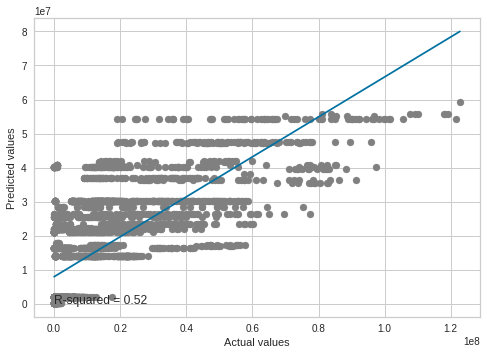

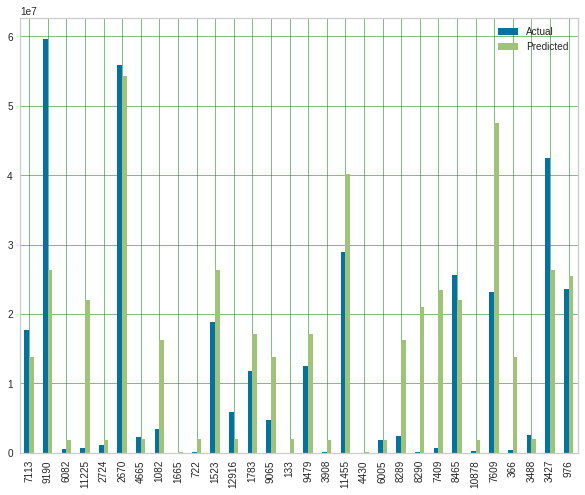

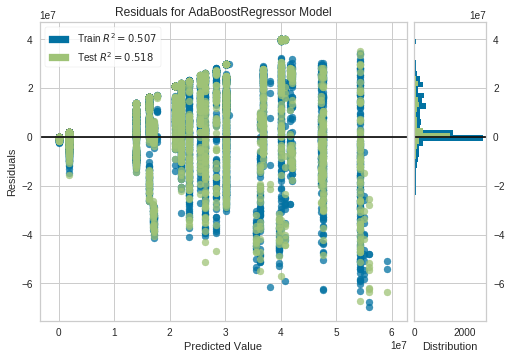

In [22]:
AdaBoost(X_train,y_train,X_test,y_test)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
print(random_grid)

In [0]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)
print(rf_random.best_params_)

In [0]:
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred) ** 0.5

In [0]:
knn=KNeighborsRegressor(n_neighbors=5,n_jobs=-1)
s=SVR(gamma='scale', C=1.0, epsilon=0.2) 
rf1=RandomForestRegressor(n_estimators= 800,min_samples_split= 2, min_samples_leaf= 1, max_features='auto', max_depth= 100, bootstrap= True)
def stacking1(X_train,y_train,X_test,y_test):
  models = [knn,s,rf1]
  S_train, S_test = stacking(models, X_train, y_train, X_test,regression = True, metric = RMSLE, n_folds = 4,shuffle = True, random_state = 42, verbose = 2)
  model = xgb.XGBRegressor(colsample_bytree=0.4,gamma=0,learning_rate=0.01,max_depth=3,min_child_weight=1.5,n_estimators=500,reg_alpha=0.75,reg_lambda=0.45,subsample=0.6,seed=42) 
  model = model.fit(S_train, y_train)
  print('Train set')
  pred=model.predict(S_train)
  print('Stacking Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
  print('Stacking r2_score :{}'.format(r2_score(y_train,pred)))
  print('Tesst set')
  pred=model.predict(S_test)
  print('Stacking Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
  print('Stacking r2_score :{}'.format(r2_score(y_test,pred)))
  plt.scatter(y_test,pred,color='gray')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred, 1))(np.unique(y_test)))
  plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2_score(y_test,pred))
  plt.show()
  df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
  df1 = df.head(30)
  df1.plot(kind='bar',figsize=(10,8))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()
  visualizer = ResidualsPlot(model)
  visualizer.fit(S_train, y_train)
  visualizer.score(S_test, y_test)
  visualizer.poof()

task:         [regression]
metric:       [RMSLE]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]
    fold  0:  [9312280.91208818]
    fold  1:  [9803934.67635565]
    fold  2:  [10547984.39471874]
    fold  3:  [10331696.13576112]
    ----
    MEAN:     [9998974.02973092] + [480027.12628772]
    FULL:     [10010489.88257845]

model  1:     [SVR]
    fold  0:  [20852794.71231196]
    fold  1:  [21272259.90602341]
    fold  2:  [21747631.05945088]
    fold  3:  [21745174.12153924]
    ----
    MEAN:     [21404464.94983137] + [372714.34874788]
    FULL:     [21407709.72743984]

model  2:     [RandomForestRegressor]
    fold  0:  [2697739.68173757]
    fold  1:  [2896176.89789285]
    fold  2:  [2579914.33312063]
    fold  3:  [2742096.64916178]
    ----
    MEAN:     [2728981.89047821] + [113273.31952324]
    FULL:     [2731331.72710197]

[04:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squ

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train set
Stacking Mean Squared error :22203313020589.58
Stacking r2_score :0.9393726645265671
Tesst set
Stacking Mean Squared error :18033556187711.004
Stacking r2_score :0.9502629577985803


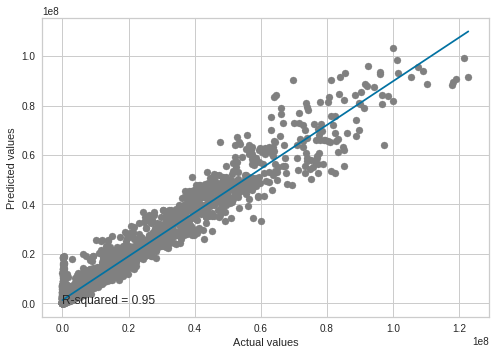

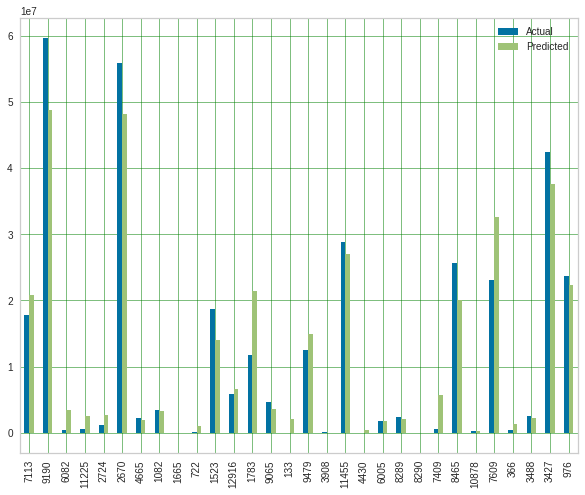

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


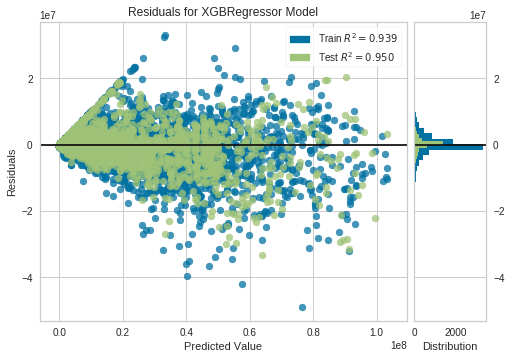

In [25]:
stacking1(X_train,y_train,X_test,y_test)

In [0]:
gbr = GradientBoostingRegressor(random_state=1, n_estimators=100)
rf1=RandomForestRegressor(n_estimators= 800,min_samples_split= 2, min_samples_leaf= 1, max_features='auto', max_depth= 100, bootstrap= True)
lr = LinearRegression()
def Votingregressor(X_train,y_train,X_test,y_test):
  model = VotingRegressor(estimators=[('gb', gbr), ('rf', rf1), ('lr', lr)])
  model = model.fit(X_train,y_train)
  print('Train set')
  pred=model.predict(X_train)
  print('Voting Regressor Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
  print('Voting Regressor r2_score :{}'.format(r2_score(y_train,pred)))
  print('Tesst set')
  pred=model.predict(X_test)
  print('Voting Regressor Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
  print('Voting Regressor r2_score :{}'.format(r2_score(y_test,pred)))
  plt.scatter(y_test,pred,color='gray')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred, 1))(np.unique(y_test)))
  plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2_score(y_test,pred))
  plt.show()
  df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
  df1 = df.head(30)
  print(df1)
  df1.plot(kind='bar',figsize=(10,8))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()
  visualizer = ResidualsPlot(model)
  visualizer.fit(X_train, y_train)
  visualizer.score(X_test, y_test)
  visualizer.poof()

Train set
Voting Regressor Mean Squared error :59695210997063.52
Voting Regressor r2_score :0.8369990289322945
Tesst set
Voting Regressor Mean Squared error :59969577980182.83
Voting Regressor r2_score :0.8346022603775589


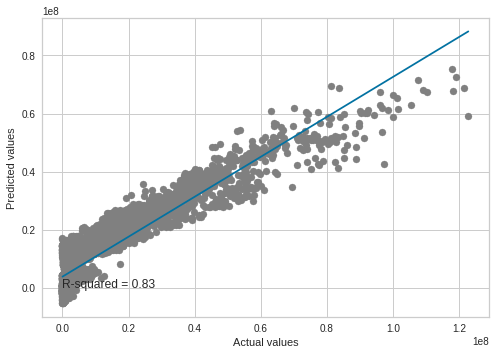

         Actual     Predicted
7113   17730000  1.831956e+07
9190   59704800  3.910450e+07
6082     495800  2.410085e+06
11225    651600  9.032618e+06
2724    1144600  2.837937e+06
2670   55842300  4.199570e+07
4665    2312400  1.491071e+06
1082    3382000  3.396792e+06
1665       5000  9.969453e+03
722      122000  1.482250e+06
1523   18779100  2.206976e+07
12916   5872700  6.106671e+06
1783   11719000  1.666112e+07
9065    4711400  1.016392e+07
133         100  2.892493e+06
9479   12517500  1.637522e+07
3908     130200  1.029734e+05
11455  28900300  2.923692e+07
4430       3400  8.067277e+05
6005    1766600  2.040738e+06
8289    2401900  1.095003e+07
8290      29200  1.094155e+07
7409     657700  1.243924e+07
8465   25636100  2.252198e+07
10878    263500  8.331926e+05
7609   23160400  2.852207e+07
366      389300  8.851194e+06
3488    2528000  2.845724e+06
3427   42430500  3.558803e+07
976    23619300  2.481818e+07


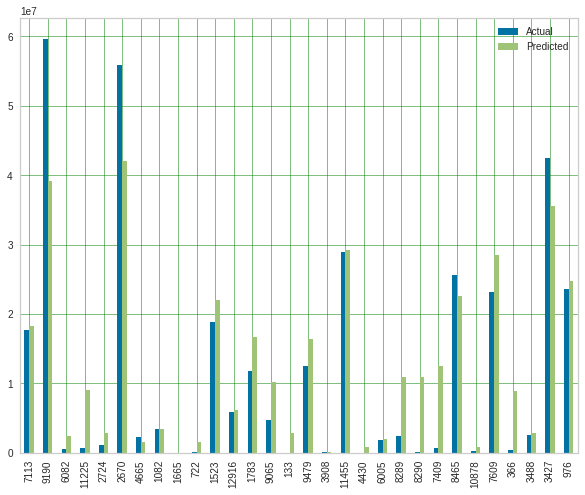

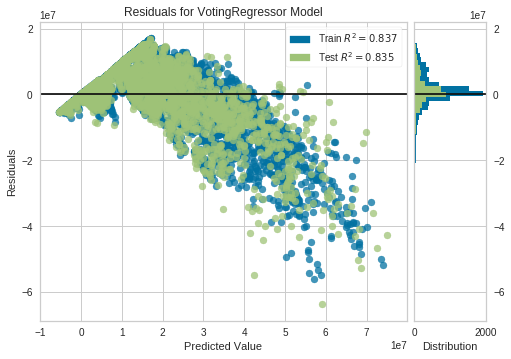

In [27]:
Votingregressor(X_train,y_train,X_test,y_test)

In [0]:
postal_code = int(input("Enter postal_Code : "))
year1 = int(input("Enter Year : "))
month = int(input("Enter Month : "))
customer_class = input("Enter Customer Class : ")

In [0]:
output_data=[]
output_data.append(postal_code)
output_data.append(year1)
output_data.append(month)

In [0]:
output_data

In [0]:
cols12

In [0]:
for i in cols12[3:]:
    if i.split("_")[1]==customer_class:
        output_data.append(1)
    else:    
        output_data.append(0)

In [0]:
output_data

In [0]:
output_data=pd.DataFrame([output_data],columns = cols12)

In [0]:
models = [knn,s,rf1]
S_train, S_test = stacking(models, X_train, y_train, output_data,regression = True, metric = RMSLE, n_folds = 4,shuffle = True, random_state = 42, verbose = 2)
model = xgb.XGBRegressor(colsample_bytree=0.4,gamma=0,learning_rate=0.01,max_depth=3,min_child_weight=1.5,n_estimators=500,reg_alpha=0.75,reg_lambda=0.45,subsample=0.6,seed=42) 
model = model.fit(S_train, y_train)

In [0]:
gbr = GradientBoostingRegressor(random_state=1, n_estimators=100)
rf1=RandomForestRegressor(n_estimators= 800,min_samples_split= 2, min_samples_leaf= 1, max_features='auto', max_depth= 100, bootstrap= True)
lr = LinearRegression()
model = VotingRegressor(estimators=[('gb', gbr), ('rf', rf1), ('lr', lr)])
model = model.fit(X_train,y_train)

In [0]:
pred=model.predict(S_test)

In [0]:
print("Prediction for newly added data : ",pred)